In [56]:
import pandas as pd
pharma_data=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [57]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model


from sklearn.metrics import f1_score    # for model evaluation

In [58]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [59]:
# Take a look at the first five observations
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [60]:
# A concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

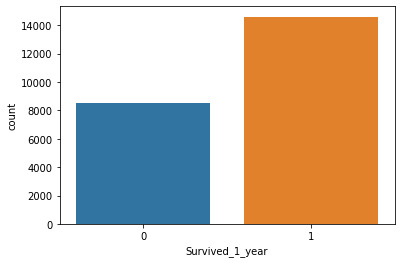

In [61]:
sns.countplot(x='Survived_1_year', data=data)
plt.show()

In [62]:
# getting only the numerical features
numeric_features = data.select_dtypes(include=[np.number])    # select_dtypes helps you to select data of particular types 
numeric_features.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [63]:
numeric_data=data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond', 'Survived_1_year']]  #keeping in the target varibale for analysis purposes
numeric_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,2.0,0
1,5,36,22.945566,1.0,1
2,23,48,27.510027,1.0,0
3,51,5,19.130976,1.0,1
4,0,128,1.348400,1.0,1


In [64]:
# ID_Patient_Care_Situation and Patient_ID are just an ID we can ignore them for data analysis.
# Number_of_prev_cond is dependent on 7 columns - A, B, C, D, E, F, Z

In [65]:
# Checking the null values in numerical columns
numeric_data.isnull().sum()

Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1235
Survived_1_year               0
dtype: int64

In [66]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])  # filling the missing value of 'Number_of_prev_cond'

numeric_data['Number_of_prev_cond']=data['Number_of_prev_cond']
numeric_data.isnull().sum()

# The returned object by using mode() is a series so we are filling the null value with the value at 0th index ( which gives us the mode of the data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

In [67]:
# Taking a look at the basic statistical description of the numerical columns
numeric_data.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000
mean,26.413127,33.209768,23.454820,1.710352,0.632247
std,15.030865,19.549882,3.807661,0.768216,0.482204
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205550,1.000000,0.000000
50%,26.000000,33.000000,23.386199,2.000000,1.000000
75%,39.000000,50.000000,26.788154,2.000000,1.000000
max,52.000000,149.000000,29.999579,5.000000,1.000000


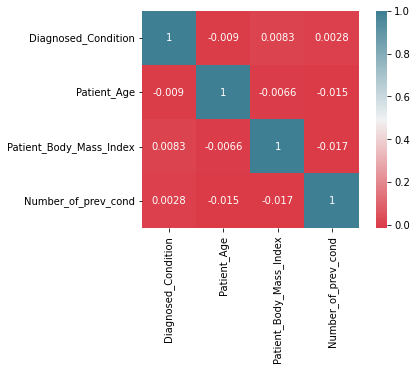

In [68]:
numeric_data=numeric_data.drop(['Survived_1_year'], axis=1)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(numeric_data.corr(),
            cmap = colormap,
            square = True,
            annot = True)
plt.show()

In [69]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

In [70]:
data['Treated_with_drugs']=data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [71]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

In [72]:
categorical_data = data.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.drop(['Patient_ID', 'ID_Patient_Care_Situation'], axis=1, inplace = True)    # dropping the id columns form the dataframe 'categorical data'
categorical_data.head()    # Now we are left with categorical columns only. take a look at first five observaiton

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,DX6,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,DX2,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,DX1,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,DX6,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [73]:
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

Treated_with_drugs          32
Patient_Smoker               3
Patient_Rural_Urban          2
Patient_mental_condition     1
A                            2
B                            2
C                            2
D                            2
E                            2
F                            2
Z                            2
Survived_1_year              2
dtype: int64

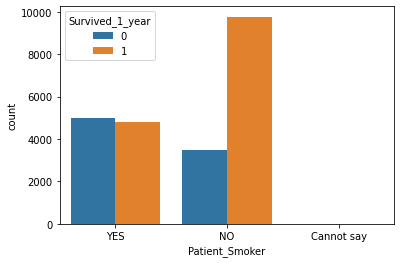

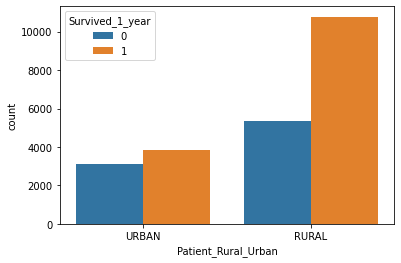

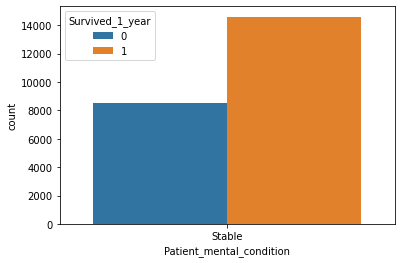

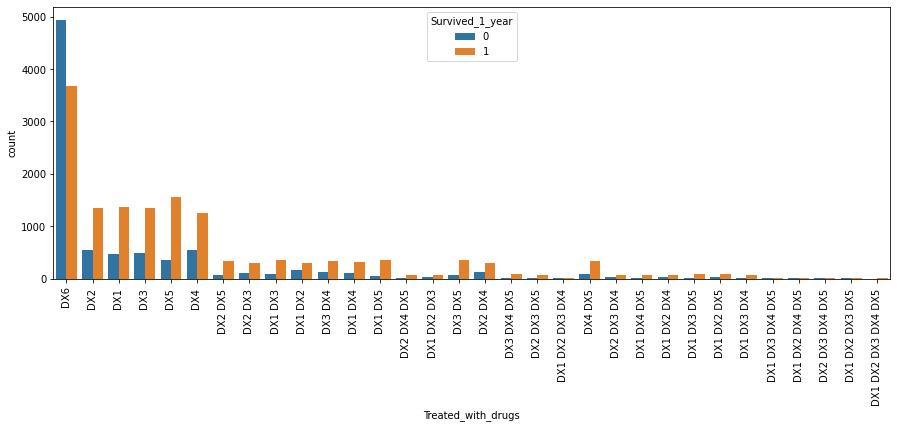

In [74]:
# Visualization of categorical columns
for feature in ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']:
  sns.countplot(x=feature,  hue='Survived_1_year', data=categorical_data)
  plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=categorical_data)
plt.xticks(rotation=90)
plt.show()

In [75]:
drugs = data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [76]:
data = pd.concat([data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
data = data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,18.479385,YES,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,48,27.510027,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,33012,0,12513,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


In [77]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [78]:
data.Patient_Smoker[data['Patient_Smoker'] == "Cannot say"] = 'NO'    # we already know 'NO' is the mode so directly changing the values 'Cannot say' to 'NO'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
data.drop('Patient_mental_condition', axis = 1, inplace=True)

In [80]:
data = pd.get_dummies(data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [81]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,0,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Patient_Age                23097 non-null  int64  
 4   Patient_Body_Mass_Index    23097 non-null  float64
 5   A                          21862 non-null  float64
 6   B                          21862 non-null  float64
 7   C                          21862 non-null  float64
 8   D                          21862 non-null  float64
 9   E                          21862 non-null  float64
 10  F                          21862 non-null  float64
 11  Z                          21862 non-null  float64
 12  Number_of_prev_cond        23097 non-null  float64
 13  Survived_1_year            23097 non-null  int

In [83]:
print(data.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(data.Patient_ID.nunique())

23097
10570


In [84]:
data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

In [85]:
data.isnull().sum()

Diagnosed_Condition             0
Patient_ID                      0
Patient_Age                     0
Patient_Body_Mass_Index         0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond             0
Survived_1_year                 0
DX1                             0
DX2                             0
DX3                             0
DX4                             0
DX5                             0
DX6                             0
Patient_Smoker_NO               0
Patient_Smoker_YES              0
Patient_Rural_Urban_RURAL       0
Patient_Rural_Urban_URBAN       0
dtype: int64

In [86]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [87]:
data.isnull().sum()

Diagnosed_Condition          0
Patient_ID                   0
Patient_Age                  0
Patient_Body_Mass_Index      0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
DX1                          0
DX2                          0
DX3                          0
DX4                          0
DX5                          0
DX6                          0
Patient_Smoker_NO            0
Patient_Smoker_YES           0
Patient_Rural_Urban_RURAL    0
Patient_Rural_Urban_URBAN    0
dtype: int64

In [88]:
X = data.drop('Survived_1_year',axis = 1)
y = data['Survived_1_year']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [90]:
model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [91]:
pred = model.predict(X_test)

In [92]:
print(f1_score(y_test,pred))

0.7872750642673523


In [93]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [94]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [95]:
y_pred = forest.predict(X_test)

fscore = f1_score(y_test ,y_pred)
fscore

0.8220447284345048

In [96]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
from boruta import BorutaPy

In [98]:
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=123,
                                          random_state=RandomState(MT19937) at 0x7F41807D3AF0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F41807D3AF0, verbose=2)

In [99]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
print("Ranking: ",boruta_selector.ranking_)               # check ranking of features
print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True False  True  True  True  True False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 2 1 1 1 1 3 1 4 5 6 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  17


In [100]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
15,DX4,1
14,DX3,1
13,DX2,1
12,DX1,1
11,Number_of_prev_cond,1


In [101]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [102]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)

In [103]:
y_important_pred = rf_important.predict(X_important_test)
rf_imp_fscore = f1_score(y_test, y_important_pred)

In [104]:
print(rf_imp_fscore)

0.8578215134034612


In [105]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [106]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [107]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [108]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 500}

In [109]:
pred = grid_search.predict(X_important_test)

In [110]:
f1_score(y_test, pred)

0.8657267539442766